In [23]:
from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://github.com/AllenDowney/ModSimPy/raw/master/' +
         'modsim.py')

Downloaded modsim.py


In [24]:
from modsim import *
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_html
# may need to install lxml

In [25]:
filename = 'World_population_estimates.html'
tables = read_html(filename, 
                   header=0,
                   index_col=0,
                   decimal='M')

In [26]:
t1 = tables[0]
t2 = tables[1]
t3 = tables[2]
t4 = tables[3]
t5 = tables[4]
t6 = tables[5]

In [27]:
t3.columns = ['Census', 'PRB', 'UN', 'Maddison', 'Hyde', 'Tanton', 'Biraben', 'MJ', 'Thomlinson', 'Durand', 'Clark']

In [28]:
t3

,Census,PRB,UN,Maddison,Hyde,Tanton,Biraben,MJ,Thomlinson,Durand,Clark
Year,,,,,,,,,,,
1950,2557628654,2.516000e+09,2.525149e+09,2.544000e+09,2.527960e+09,2.400000e+09,2.527000e+09,2.500000e+09,2.400000e+09,NaN,2.486000e+09
1951,2594939877,NaN,2.572851e+09,2.571663e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1952,2636772306,NaN,2.619292e+09,2.617949e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1953,2682053389,NaN,2.665865e+09,2.665959e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1954,2730228104,NaN,2.713172e+09,2.716927e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2012,7013871313,7.057075e+09,7.080072e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2013,7092128094,7.136796e+09,7.162119e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2014,7169968185,7.238184e+09,7.243784e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
census = t3.Census / 1e9

In [30]:
census.head()

Year
1950    2.557629
1951    2.594940
1952    2.636772
1953    2.682053
1954    2.730228
Name: Census, dtype: float64

In [31]:
census.tail()

Year
2012    7.013871
2013    7.092128
2014    7.169968
2015    7.247893
2016    7.325997
Name: Census, dtype: float64

In [32]:
un = t3.UN / 1e9

In [33]:
un.head()

Year
1950    2.525149
1951    2.572851
1952    2.619292
1953    2.665865
1954    2.713172
Name: UN, dtype: float64

In [34]:
un.tail()

Year
2012    7.080072
2013    7.162119
2014    7.243784
2015    7.349472
2016         NaN
Name: UN, dtype: float64

works
works


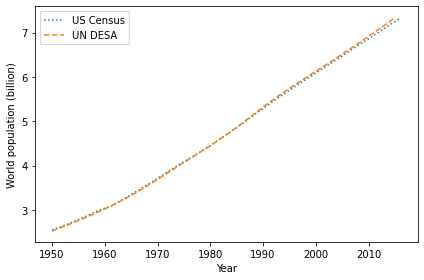

In [37]:
census.plot(style=':', label= 'US Census')
print('works')
un.plot(style='--', label= 'UN DESA')
print('works')
decorate(xlabel='Year',
        ylabel='World population (billion)')

works
works


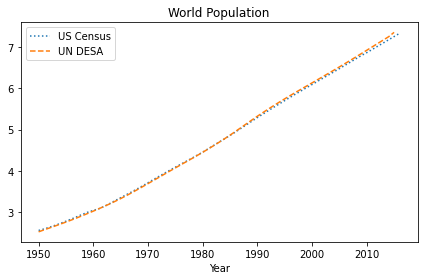

In [38]:
plot_estimates()
decorate(title='World Population')

## Absolute and Relative Errors

In [39]:
# compute absolute errors
from numpy import abs

In [40]:
abs_error = abs(un - census)

In [42]:
abs_error.tail()

Year
2012    0.066201
2013    0.069991
2014    0.073816
2015    0.101579
2016         NaN
dtype: float64

In [43]:
# compute the mean(abs_error)
from numpy import mean

In [44]:
mean(abs_error)

0.029034508242424265

In [45]:
# compute max(abs_error)
from numpy import max
max(abs_error)

0.10157921199999986

In [46]:
# calculate relative error--the size of the error divided by the estimates
rel_error = abs_error / census * 100

In [47]:
rel_error.tail()

Year
2012    0.943860
2013    0.986888
2014    1.029514
2015    1.401500
2016         NaN
dtype: float64

In [48]:
mean(rel_error)

0.5946585816022846

In [49]:
census[1997]

5.857972543

In [50]:
census[1987]

5.027200492

In [51]:
census.tail()

Year
2012    7.013871
2013    7.092128
2014    7.169968
2015    7.247893
2016    7.325997
Name: Census, dtype: float64

In [65]:
# compute total growth
t_0 = census.index[0]
t_end = census.index[-1]
elapsed_time = t_end - t_0

p_0 = census[t_0]
p_end = census[t_end]
total_growth = p_end - p_0

# average annual growth
annual_growth = total_growth / elapsed_time

In [67]:
annual_growth

0.07224800083333333

In [59]:
t_end

2016

In [68]:
results = TimeSeries()

In [69]:
results[t_0] = p_0

In [70]:
show(results)

,Quantity
Time,
1950,2.557629


In [71]:
for t in range(t_0, t_end):
    results[t+1] = results[t] + annual_growth

In [72]:
show(results)

,Quantity
Time,
1950,2.557629
1951,2.629877
1952,2.702125
1953,2.774373
1954,2.846621
...,...
2012,7.037005
2013,7.109253
2014,7.181501


In [ ]:
results.plot(color='gray', label='model')
plot)